In [2]:
# XAI Survey Data Analysis Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Set the style for our visualizations
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.2)
sns.set_palette("colorblind")

# 1. Load the data
print("Loading the XAI survey data...")
df = pd.read_csv('SurveyResults.csv')

# 2. Clean the data - remove specified columns
columns_to_remove = [
    "Submission ID", 
    "Last updated", 
    "Submission started", 
    "Status", 
    "Current step", 
    "Errors", 
    "Url", 
    "Network ID"
]

# Create a clean dataframe without these columns
df_clean = df.drop(columns=columns_to_remove, errors='ignore')
print(f"Cleaned data shape: {df_clean.shape}")

Loading the XAI survey data...
Cleaned data shape: (30, 20)


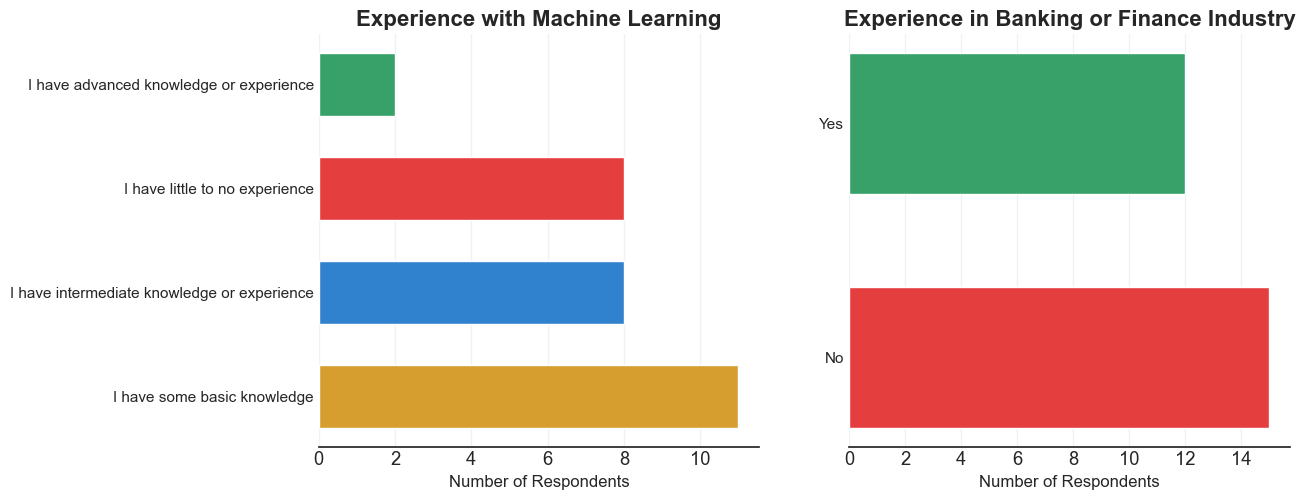

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Demographics
ml_exp_clean = df["Which statement best describes your experience with Machine Learning ?"] \
    .dropna().str.strip()
finance_exp_clean = df["Have you ever worked in the banking or finance industry ?"] \
    .dropna().str.replace(r'\s+|❌|✅|\\n', '', regex=True).str.strip()

# Modern, saturated semantic palette
ml_semantic_colors = {
    'I have little to no experience': '#E53E3E',   # Bold red
    'I have some basic knowledge':   '#D69E2E',   # Deep amber
    'I have intermediate knowledge or experience': '#3182CE',  # Strong blue
    'I have advanced knowledge or experience': '#38A169'       # Vibrant green
}
finance_semantic_colors = {
    'Yes': '#38A169',  # Vibrant green
    'No':  '#E53E3E'   # Bold red
}

ml_counts = ml_exp_clean.value_counts()
finance_counts = finance_exp_clean.value_counts()

# Robust color mapper
def get_color(label, cmap):
    return cmap.get(label.strip(), '#A0AEC0')  # fallback grey

ml_colors      = [get_color(lbl, ml_semantic_colors)      for lbl in ml_counts.index]
finance_colors = [get_color(lbl, finance_semantic_colors) for lbl in finance_counts.index]

# Set up modern white background
plt.style.use('seaborn-white')
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
fig.patch.set_facecolor('white')

for ax in axes:
    ax.set_facecolor('white')
    ax.grid(axis='x', color='#EDF2F7', linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# ML Experience Bar Chart
axes[0].barh(ml_counts.index, ml_counts.values, color=ml_colors, edgecolor='white', height=0.6)
axes[0].set_title("Experience with Machine Learning", fontsize=16, fontweight='600')
axes[0].set_xlabel("Number of Respondents", fontsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Finance Industry Experience Bar Chart
axes[1].barh(finance_counts.index, finance_counts.values, color=finance_colors, edgecolor='white', height=0.6)
axes[1].set_title("Experience in Banking or Finance Industry", fontsize=16, fontweight='600')
axes[1].set_xlabel("Number of Respondents", fontsize=12)
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout(pad=3)
plt.show()


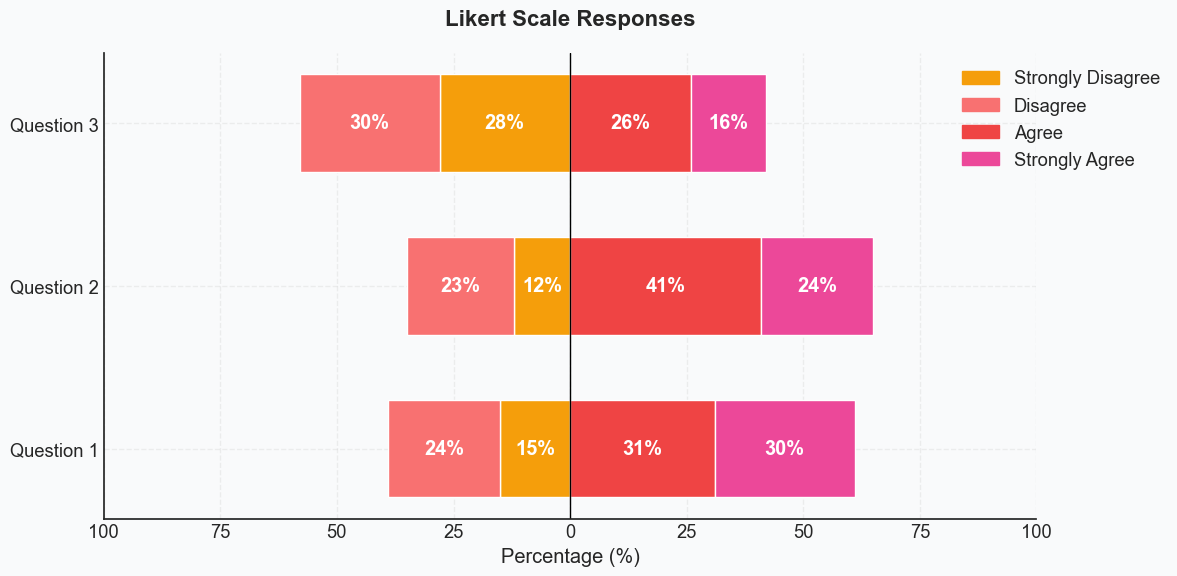

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data for 100 respondents and 3 Likert scale questions
np.random.seed(42)  # For reproducibility

# Create sample data
n_respondents = 100
data = {
    'likert_q1': np.random.randint(1, 5, size=n_respondents),  # 1-4 scale
    'likert_q2': np.random.randint(1, 5, size=n_respondents),
    'likert_q3': np.random.randint(1, 5, size=n_respondents)
}

# Make the data more realistic
for i in range(n_respondents):
    if data['likert_q1'][i] < 3 and np.random.random() < 0.3:
        data['likert_q1'][i] += 1
    if data['likert_q2'][i] < 3 and np.random.random() < 0.6:
        data['likert_q2'][i] += 1
    if data['likert_q3'][i] > 2 and np.random.random() < 0.4:
        data['likert_q3'][i] = max(1, data['likert_q3'][i] - 1)

# Create a pandas DataFrame
df = pd.DataFrame(data)

def plot_diverging_likert(df, questions, likert_columns, fig_title="Likert Scale Responses"):
    """
    Create a diverging horizontal stacked bar chart for Likert scale questions
    with negative values for disagreement and positive for agreement
    """
    
    # Define colors for a 4-point scale - using modern semantic colors
    colors = ['#F59E0B', '#F87171', '#EF4444', '#EC4899']  # Amber, Light Red, Red, Pink
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set figure background color
    fig.patch.set_facecolor('#F9FAFB')
    ax.set_facecolor('#F9FAFB')
    
    # Set up y positions for each question
    y_pos = np.arange(len(questions))
    
    # For tracking where to place the bars for each question
    left_sides = np.zeros(len(questions))  # For negative values (disagree)
    right_sides = np.zeros(len(questions))  # For positive values (agree)
    
    # Process each question
    for i, (question, column) in enumerate(zip(questions, likert_columns)):
        # Get response counts
        counts = df[column].value_counts(normalize=True) * 100
        
        # Ensure all responses are represented
        all_responses = range(1, 5)  # 4-point scale
        for resp in all_responses:
            if resp not in counts.index:
                counts[resp] = 0
        
        # Sort by index
        counts = counts.sort_index()
        
        # Split responses into disagree (left) and agree (right)
        # 1 & 2 are disagree, 3 & 4 are agree
        for j, (response, value) in enumerate(counts.items()):
            if response <= 2:  # Disagree responses (left side, negative values)
                left = left_sides[i]
                left_sides[i] += -value  # Accumulate leftward
                ax.barh(y_pos[i], -value, left=left, color=colors[j], 
                       height=0.6, edgecolor='white', linewidth=1)
                
                # Add percentage label if segment is wide enough
                if value > 5:
                    ax.text(left - value/2, y_pos[i], f'{value:.0f}%', 
                           ha='center', va='center', color='white', fontweight='bold')
                
            else:  # Agree responses (right side, positive values)
                left = right_sides[i]
                right_sides[i] += value  # Accumulate rightward
                ax.barh(y_pos[i], value, left=left, color=colors[j], 
                       height=0.6, edgecolor='white', linewidth=1)
                
                # Add percentage label if segment is wide enough
                if value > 5:
                    ax.text(left + value/2, y_pos[i], f'{value:.0f}%', 
                           ha='center', va='center', color='white', fontweight='bold')
    
    # Set up the y-axis
    ax.set_yticks(y_pos)
    ax.set_yticklabels(questions)
    
    # Set up the x-axis
    ax.set_xlim(-100, 100)
    ax.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75, 100])
    ax.set_xticklabels(['100', '75', '50', '25', '0', '25', '50', '75', '100'])
    ax.set_xlabel('Percentage (%)')
    
    # Add a vertical line at x=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Remove spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Add legend
    likert_labels = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']
    legend_patches = [plt.Rectangle((0,0),1,1, color=colors[j]) for j in range(len(likert_labels))]
    ax.legend(legend_patches, likert_labels, loc='upper right', 
              bbox_to_anchor=(1.15, 1), frameon=False)
    
    # Set title
    ax.set_title(fig_title, fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Define our test questions
questions = [
    "Question 1",
    "Question 2",
    "Question 3"
]

likert_columns = ['likert_q1', 'likert_q2', 'likert_q3']

# Create the plot
fig = plot_diverging_likert(df, questions, likert_columns, "Likert Scale Responses")
plt.show()

In [4]:
df = pd.read_csv('xai_survey_clean.csv')

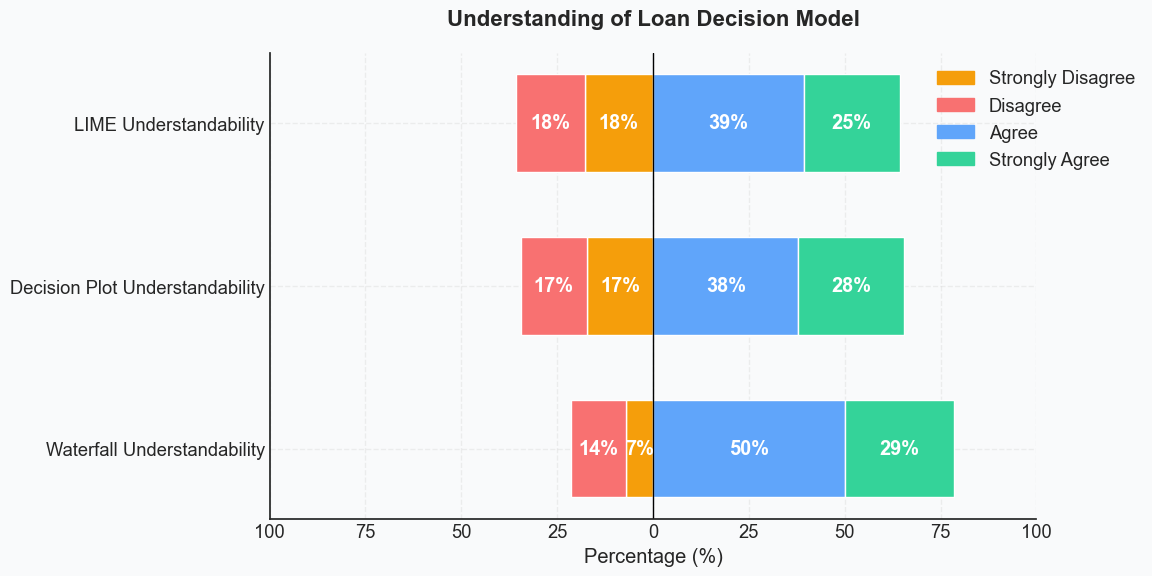

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def create_likert_plot(df, title="Understanding of Loan Decision Model"):
    """
    Create a diverging Likert scale plot for loan decision understanding questions.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the Likert scale data
    title : str
        Title for the chart
        
    Returns:
    --------
    fig : matplotlib Figure
        The created figure
    """
    # Define the column names for your Likert questions
    likert_columns = [
        "understanding_chart1",
        "understanding_chart2",
        "understanding_chart3"
    ]
    
    # Define shortened question labels for the y-axis
    questions = [
        "Waterfall Understandability",
        "Decision Plot Understandability",
        "LIME Understandability"
    ]
    
    # Define colors for a 4-point scale - using modern semantic colors
    # From Strongly Disagree to Strongly Agree
    colors = ['#F59E0B', '#F87171', '#60A5FA', '#34D399']  # Amber, Red, Blue, Green
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set figure background color
    fig.patch.set_facecolor('#F9FAFB')
    ax.set_facecolor('#F9FAFB')
    
    # Set up y positions for each question
    y_pos = np.arange(len(questions))
    
    # For tracking where to place the bars for each question
    left_sides = np.zeros(len(questions))  # For negative values (disagree)
    right_sides = np.zeros(len(questions))  # For positive values (agree)
    
    # Process each question
    for i, (question, column) in enumerate(zip(questions, likert_columns)):
        # Skip if column doesn't exist in the dataframe
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in dataframe. Skipping this question.")
            continue
            
        # Get response counts, handling missing values
        column_data = df[column].dropna()
        if len(column_data) == 0:
            print(f"Warning: No data for '{column}'. Skipping this question.")
            continue
            
        counts = column_data.value_counts(normalize=True) * 100
        
        # Ensure all responses are represented
        all_responses = range(1, 5)  # 4-point scale
        for resp in all_responses:
            if resp not in counts.index:
                counts[resp] = 0
        
        # Sort by index
        counts = counts.sort_index()
        
        # Split responses into disagree (left) and agree (right)
        # 1 & 2 are disagree, 3 & 4 are agree
        for j, (response, value) in enumerate(counts.items()):
            if response <= 2:  # Disagree responses (left side, negative values)
                left = left_sides[i]
                left_sides[i] += -value  # Accumulate leftward
                ax.barh(y_pos[i], -value, left=left, color=colors[j], 
                       height=0.6, edgecolor='white', linewidth=1)
                
                # Add percentage label if segment is wide enough
                if value > 5:
                    ax.text(left - value/2, y_pos[i], f'{value:.0f}%', 
                           ha='center', va='center', color='white', fontweight='bold')
                
            else:  # Agree responses (right side, positive values)
                left = right_sides[i]
                right_sides[i] += value  # Accumulate rightward
                ax.barh(y_pos[i], value, left=left, color=colors[j], 
                       height=0.6, edgecolor='white', linewidth=1)
                
                # Add percentage label if segment is wide enough
                if value > 5:
                    ax.text(left + value/2, y_pos[i], f'{value:.0f}%', 
                           ha='center', va='center', color='white', fontweight='bold')
    
    # Set up the y-axis
    ax.set_yticks(y_pos)
    ax.set_yticklabels(questions)
    
    # Set up the x-axis
    ax.set_xlim(-100, 100)
    ax.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75, 100])
    ax.set_xticklabels(['100', '75', '50', '25', '0', '25', '50', '75', '100'])
    ax.set_xlabel('Percentage (%)')
    
    # Add a vertical line at x=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    # Add grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Remove spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Add legend
    likert_labels = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']
    legend_patches = [plt.Rectangle((0,0),1,1, color=colors[j]) for j in range(len(likert_labels))]
    ax.legend(legend_patches, likert_labels, loc='upper right', 
              bbox_to_anchor=(1.15, 1), frameon=False)
    
    # Set title
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    return fig

# Example usage with your dataframe:
fig = create_likert_plot(df)
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def create_likert_plot(df, likert_columns=None, title=None, statement=None):
    """
    Create a diverging Likert scale plot for loan decision understanding questions.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the Likert scale data
    likert_columns : list of str
        List of column names in the DataFrame containing Likert scale responses
    title : str
        Title for the chart
    statement : str, optional
        The main statement text to display below the title
    """
    # Use default values if not provided
    if likert_columns is None:
        likert_columns = [
            "understanding_chart1",
            "understanding_chart2",
            "understanding_chart3"
        ]
    
    # Define static question labels for the y-axis
    questions = [
        "SHAP Waterfall Plot ",
        "SHAP Decision Plot ",
        "LIME Plot"
    ]
    
    # Ensure likert_columns and questions have the same length
    if len(likert_columns) != len(questions):
        raise ValueError(f"likert_columns must have exactly {len(questions)} elements to match the static questions")
    
    # Define colors for a 4-point scale - from Strongly Disagree to Strongly Agree
    colors = ['#F59E0B', '#F87171', '#60A5FA', '#34D399']  # Amber, Red, Blue, Green
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set figure background color
    fig.patch.set_facecolor('#F9FAFB')
    ax.set_facecolor('#F9FAFB')
    
    # Set up y positions for each question
    y_pos = np.arange(len(questions))
    
    # For tracking where to place the bars for each question
    left_sides = np.zeros(len(questions))  # For negative values (disagree)
    right_sides = np.zeros(len(questions))  # For positive values (agree)
    
    # Process each question
    for i, (question, column) in enumerate(zip(questions, likert_columns)):
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in dataframe. Skipping this question.")
            continue
        
        column_data = df[column].dropna()
        if len(column_data) == 0:
            print(f"Warning: No data for '{column}'. Skipping this question.")
            continue
        
        counts = column_data.value_counts(normalize=True) * 100
        for resp in range(1,5):
            if resp not in counts.index:
                counts[resp] = 0
        counts = counts.sort_index()
        
        # Plot negative and positive segments
        for j, (response, value) in enumerate(counts.items()):
            if response <= 2:
                left = left_sides[i]
                left_sides[i] -= value
                ax.barh(y_pos[i], -value, left=left, color=colors[j], height=0.6, edgecolor='white', linewidth=1)
                if value > 5:
                    ax.text(left - value/2, y_pos[i], f'{value:.0f}%', ha='center', va='center', color='white', fontweight='bold')
            else:
                left = right_sides[i]
                right_sides[i] += value
                ax.barh(y_pos[i], value, left=left, color=colors[j], height=0.6, edgecolor='white', linewidth=1)
                if value > 5:
                    ax.text(left + value/2, y_pos[i], f'{value:.0f}%', ha='center', va='center', color='white', fontweight='bold')
    
    # Set y-axis labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(questions)
    
    # Configure x-axis
    ax.set_xlim(-100, 100)
    ax.set_xticks(np.linspace(-100, 100, 9))
    ax.set_xticklabels(['100', '75', '50', '25', '0', '25', '50', '75', '100'])
    ax.set_xlabel('Percentage (%)')
    ax.axvline(x=0, color='black', linewidth=1)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Draw the main title (bold, larger)
    if title:
        ax.set_title(title,
                 fontsize=16,
                 fontweight='bold',
                 pad=20)

    # Draw the statement as a subtitle (smaller, normal weight)
    if statement:
        ax.text(
            0.5,            # x-center in axes coordinates
            1.00,           # y just above the top of the axes (1.00)
            statement,
            transform=ax.transAxes,
            fontsize=12,
            fontweight='normal',
            ha='center',    # horizontal alignment
            va='bottom',    # vertical alignment
            color='gray'
        )
    
    # Add legend
    likert_labels = ['Strongly Disagree', 'Disagree', 'Agree', 'Strongly Agree']
    legend_patches = [plt.Rectangle((0,0),1,1, color=colors[j]) for j in range(len(likert_labels))]
    ax.legend(legend_patches, likert_labels, loc='upper right', bbox_to_anchor=(1.15, 1), frameon=False)
    
    plt.tight_layout()
    return fig

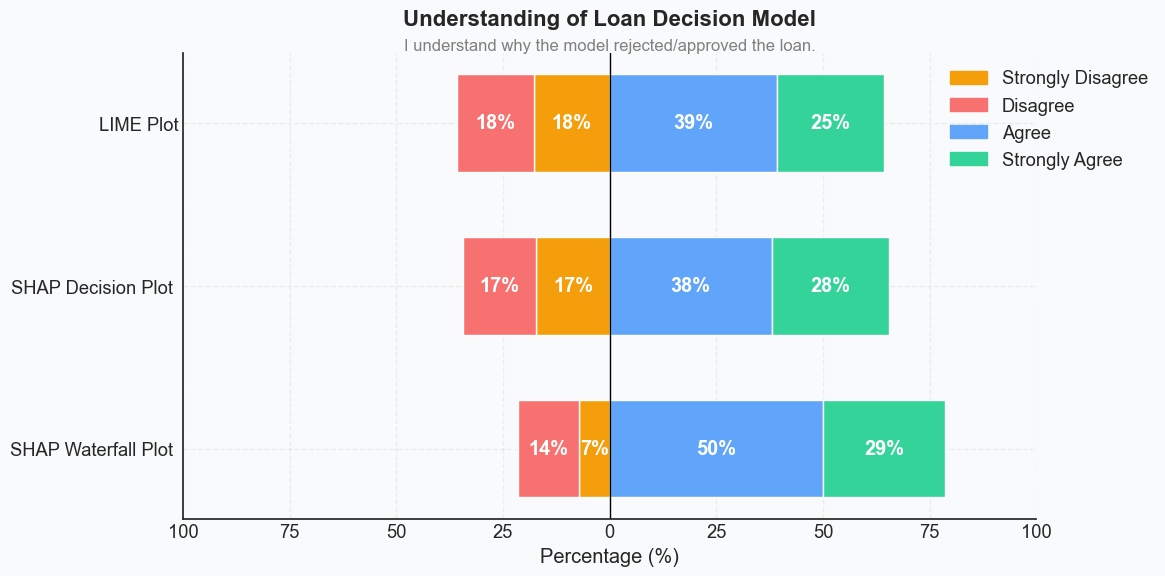

In [7]:
likert_columns = [
            "understanding_chart1",
            "understanding_chart2",
            "understanding_chart3"
        ]
    
fig = create_likert_plot(df,likert_columns,"Understanding of Loan Decision Model", "I understand why the model rejected/approved the loan." )
plt.show()

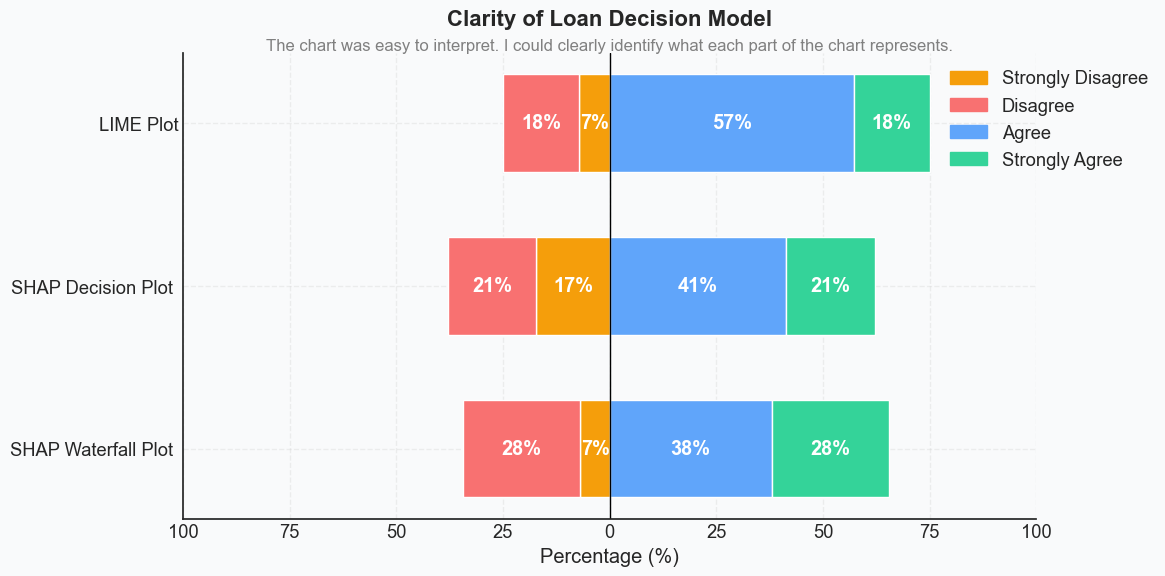

In [8]:
likert_columns = [
            "interpretability_chart1",
            "interpretability_chart2",
            "interpretability_chart3"
        ]
    
fig = create_likert_plot(df,likert_columns,"Clarity of Loan Decision Model", "The chart was easy to interpret. I could clearly identify what each part of the chart represents." )
plt.show()

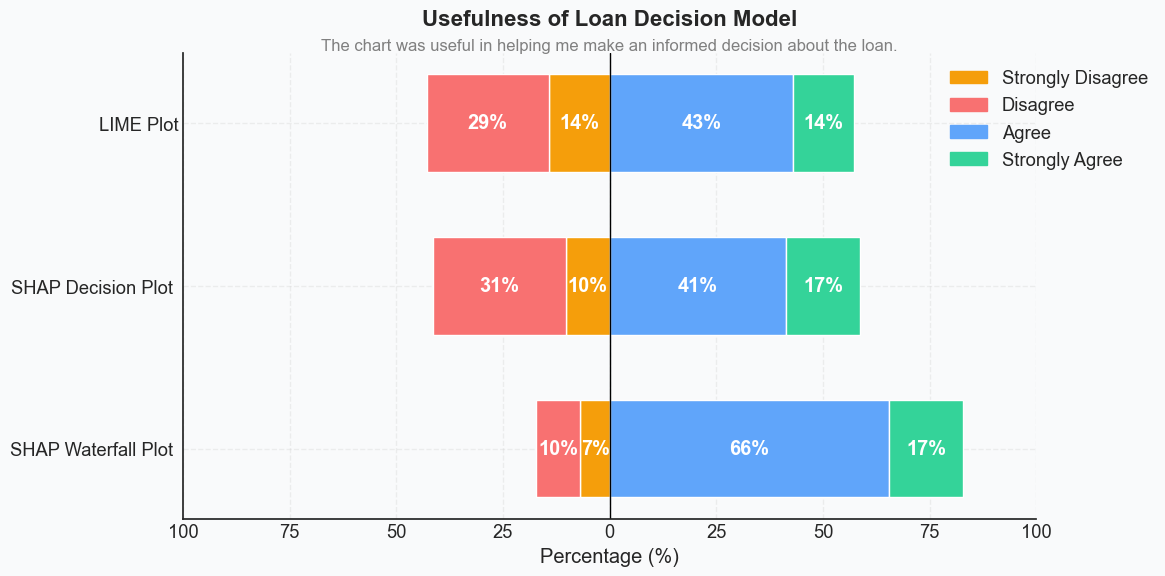

In [9]:
likert_columns = [
            "usefulness_chart1",
            "usefulness_chart2",
            "usefulness_chart3"
        ]
    
fig = create_likert_plot(df,likert_columns,"Usefulness of Loan Decision Model", "The chart was useful in helping me make an informed decision about the loan." )
plt.show()

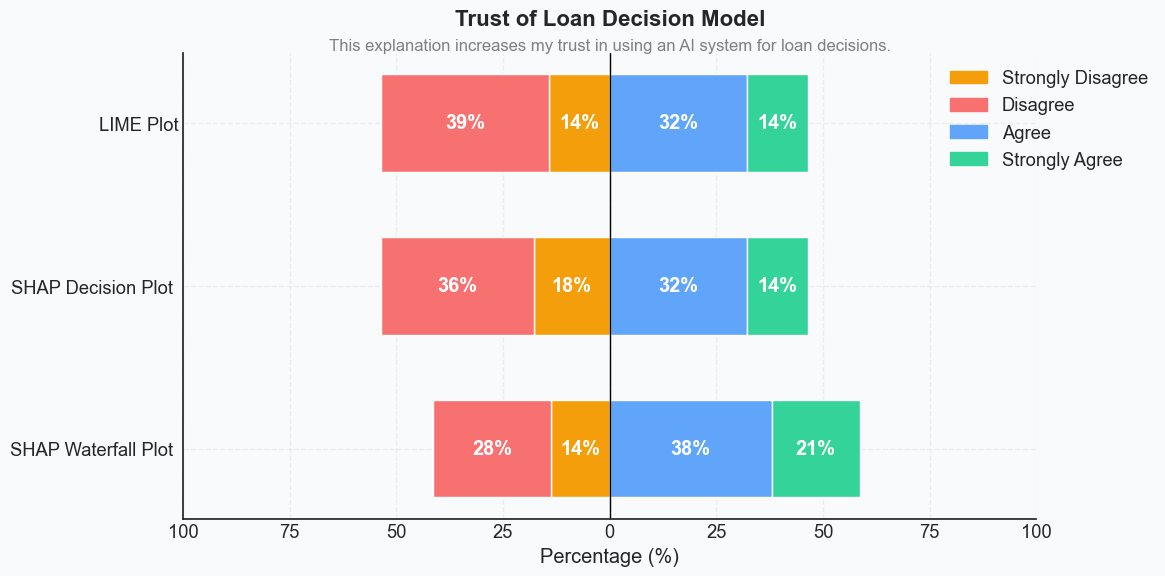

In [10]:
likert_columns = [
            "trust_chart1",
            "trust_chart2",
            "trust_chart3"
        ]
    
fig = create_likert_plot(df,likert_columns,"Trust of Loan Decision Model", "This explanation increases my trust in using an AI system for loan decisions." )
plt.show()

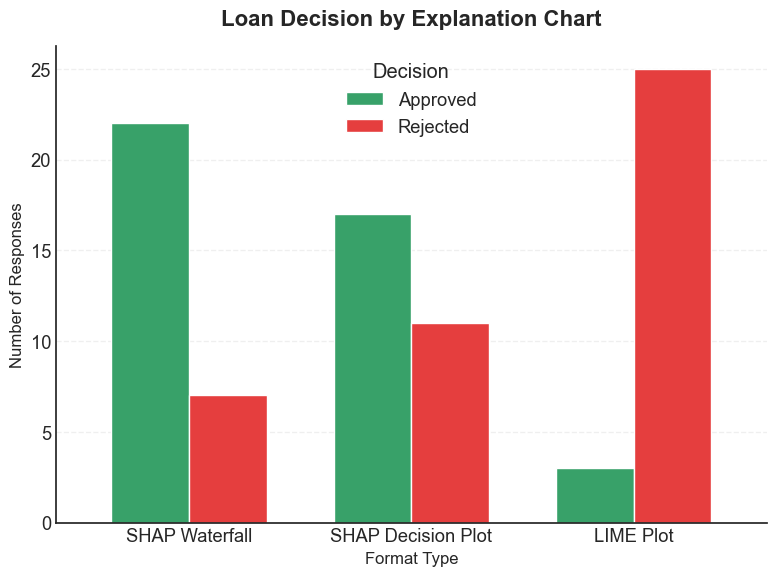

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Columns to analyze
cols = ['loan_decision_chart1', 'loan_decision_chart2', 'loan_decision_chart3']
chart_names = ['SHAP Waterfall', 'SHAP Decision Plot', 'LIME Plot']

# Ensure string type for flexible matching
df[cols] = df[cols].astype(str)

# Tabulate counts
counts = df[cols].apply(lambda s: s.value_counts()).T.fillna(0)

# Identify categories
approved_cols = [c for c in counts.columns if 'approve' in c.lower()]
rejected_cols = [c for c in counts.columns if 'reject'  in c.lower()]

# Check for presence of expected values
if not approved_cols or not rejected_cols:
    raise ValueError("No 'approve' or 'reject' labels found in your data columns.")

# Summarize into approved/rejected
plot_df = pd.DataFrame({
    'Approved': counts[approved_cols].sum(axis=1),
    'Rejected': counts[rejected_cols].sum(axis=1),
}, index=cols)

# Plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
plot_df.plot(kind='bar', ax=ax, color=['#38A169', '#E53E3E'], edgecolor='white', width=0.7)

# Style
ax.set_title("Loan Decision by Explanation Chart", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Format Type", fontsize=12)
ax.set_ylabel("Number of Responses", fontsize=12)
ax.set_xticks(range(len(chart_names)))
ax.set_xticklabels(chart_names, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Decision', frameon=False)

plt.tight_layout()
plt.show()


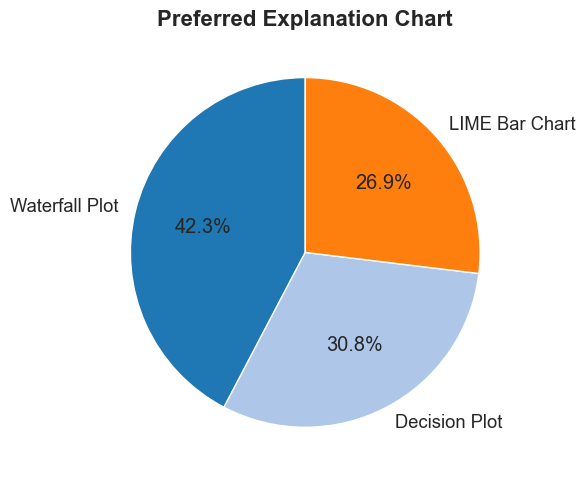

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Count unique values in the "preferred_chart" column
counts = df['preferred_chart'].value_counts()

# 2. Plot as a pie chart
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
counts.plot.pie(
    ax=ax,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.get_cmap('tab20')(range(len(counts))),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

ax.set_ylabel('')  # hide y-label
ax.set_title('Preferred Explanation Chart', fontsize=16, fontweight='bold')


plt.tight_layout()
plt.show()
